# Numba - CPU

Numba adalah JIT (Just-In-Time) compiler yang menerjemahkan code Python ke dalam bahasa machine.

* Menggunakan special decorator pada fungsi Python, Numba meng-compile fungsi tersebut ke dalam bahasa mesin menggunakan LLVM.
* Numba compatible dengan array NumPy.
* Dapat melakukan paralelisasi yang dapat memanfaatkan semua CPU core.

In [1]:
import numpy as np

def inner_rows(C,A,B):
    for i in range(len(A)):
        for j in range(len(A)):
            C[i,j] = A[i,j] + B[i,j]

def inner_cols(C,A,B):
    for j in range(len(A)):
        for i in range(len(A)):
            C[i,j] = A[i,j] + B[i,j]


def inner_alloc(C,A,B):
    for i in range(len(A)):
        for j in range(len(A)):
            val = [A[i,j] + B[i,j]]
            C[i,j] = val[0]


In [2]:
A = np.random.rand(100,100)
B = np.random.rand(100,100)
C = np.random.rand(100,100)


In [3]:
%timeit inner_rows(C,A,B)
%timeit inner_cols(C,A,B)
%timeit inner_alloc(C,A,B)

3.22 ms ± 73.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.31 ms ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.75 ms ± 17 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%load_ext memory_profiler

In [5]:
%memit inner_rows(C,A,B)
%memit inner_cols(C,A,B)
%memit inner_alloc(C,A,B)

peak memory: 84.86 MiB, increment: 0.31 MiB
peak memory: 84.86 MiB, increment: 0.00 MiB
peak memory: 84.88 MiB, increment: 0.02 MiB


## Menggunakan Decorator JIT

### Contoh 1

In [6]:
import math
import numpy as np
import numba
import matplotlib.pyplot as plt

**Python**

In [9]:
def prima(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt+1):
            if n % 1 == 0:
                return False
    
    return True

In [10]:
n = np.random.randint(2, 1000, dtype=np.int64)
print(n, prima(n))

463 False


**numba.jit**

In [11]:
@numba.jit
def prima_numba(n):
    if n <= 1:
        raise ArithmeticError('"%s" <= 1' % n)
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt+1):
            if n % i == 0:
                return False
    
    return True

In [12]:
angka = np.random.randint(2, 1000_000, dtype=np.int64, size=10000)

%time p1 = [prima(n) for i in angka]
%time p2 = [prima_numba(n) for i in angka]

CPU times: user 25.6 ms, sys: 609 µs, total: 26.2 ms
Wall time: 25.7 ms


/var/folders/d8/_nrt2sy9567f87n08gxx0xc00000gn/T/ipykernel_3446/3630688653.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Internal error in pre-inference rewriting pass encountered during compilation of function "prima_numba" due to: Constant inference not possible for: $const12.1 % n

File "../../../../../var/folders/d8/_nrt2sy9567f87n08gxx0xc00000gn/T/ipykernel_3446/3630688653.py", line 4:
<source missing, REPL/exec in use?>

  @numba.jit
/var/folders/d8/_nrt2sy9567f87n08gxx0xc00000gn/T/ipykernel_3446/3630688653.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "prima_numba" failed type inference due to: Unsupported constraint encountered: raise $18call_function.4

File "../../../../../var/folders/d8/_nrt2sy9567f87n08gxx0xc00000gn/T/ipykernel_3446/3630688653.py", line 4:
<source missing, REPL/exec in use?>

  @numba.jit
/Users/muhazaliebenlito/opt/miniconda3/lib/python3.9/site

CPU times: user 416 ms, sys: 26.9 ms, total: 442 ms
Wall time: 481 ms


**numba.njit** atau **numba.jit(nopython=True)**

In [13]:
@numba.njit
def prima_numba_njit(n):
    if n <= 1:
        raise ArithmeticError('"angka" <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt+1):
            if n % i == 0:
                return False
    
    return True

In [15]:
%time p1 = [prima(n) for i in angka]
%time p2 = [prima_numba_njit(n) for i in angka]

CPU times: user 26.7 ms, sys: 1.23 ms, total: 28 ms
Wall time: 27.3 ms
CPU times: user 2.58 ms, sys: 358 µs, total: 2.93 ms
Wall time: 2.6 ms


### Contoh 2

In [16]:
import numba
import numpy as np

In [17]:
def py_sum(x):
    hasil = 0
    for i in range(len(x)):
        hasil = hasil + x[i]
    return hasil

In [18]:
@numba.jit(nopython=True) # Decorator Numba
def numba_sum(x):
    hasil = 0
    for i in range(len(x)):
        hasil = hasil + x[i]
    return hasil

In [19]:
# generating data
x = np.random.randint(10, 100, 100_000)
x.shape

(100000,)

In [20]:
%timeit py_sum(x)

12.2 ms ± 376 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit numba_sum(x)

25.9 µs ± 70.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Benchmark Vektor Python vs NumPy vs Numba

In [22]:
import numpy as np
import numba
from time import time

In [23]:
def vekPy(a, b, c, d):
    for i in range(a.shape[0]):
        a[i] = b[i] + c[i] * d[i]

def vekNumpy(a, b, c, d):
    a[:] = b + c * d
    
@numba.njit
def vekNumba(a, b, c, d):
    for i in range(a.shape[0]):
        a[i] = b[i] + c[i] * d[i]

In [24]:
## Inisialisasi

n = 10000 # ukuran vektor
r = 100 # jumlah iterasi

a = np.zeros(n, dtype=np.float64)
b = np.empty_like(a)
b[:] = 1.0
c = np.empty_like(a)
c[:] = 1.0
d = np.empty_like(a)
d[:] = 1.0

**Python**

In [25]:
start = time()

for i in range(r):
    vekPy(a,b,c,d)

mflops = 2.0 * r * n / ((time() - start) * 1e6)
print("Python: {} MFlops/sec".format(mflops))

Python: 5.7036105290211685 MFlops/sec


**Numpy**

In [26]:
start = time()

for i in range(r):
    vekNumpy(a,b,c,d)

mflops = 2.0 * r * n / ((time() - start) * 1e6)
print("Numpy: {} MFlops/sec".format(mflops))

Numpy: 583.1091338801613 MFlops/sec


**Numba**

In [28]:
start = time()

for i in range(r):
    vekNumba(a,b,c,d)

mflops = 2.0 * r * n / ((time() - start) * 1e6)
print("Numba: {} MFlops/sec".format(mflops))

Numba: 1065.4906642956942 MFlops/sec


### Latihan

Buat fungsi `numba_sum(x, y)` untuk menghitung jarak-$L_1$ 

$$
L_1 = \sum_{i=0}^{N-1} |x_i - y_i|.
$$

Kemudian, buat perbandingan waktu komputasi antara **python original**, menggunakan **numpy.sum**, dan **numba**. Gunakan modul `from time import time` untuk menghitung waktu eksekusinya.

Jalankan 10 kali perhitungan di atas dan simpan hasilnya kemudian tampilkan nilai rata-rata dan standard deviasi dari perhitungan tersebut.

In [39]:
print(hasil_py_sum)
print(hasil_np_sum)
print(hasil_numba_sum)

[0.30119705 0.28959799 0.2904911  0.29201007 0.29268193 0.29232407
 0.29312205 0.29090905 0.29342794 0.29001689]
[0.00275707 0.00300717 0.003232   0.002918   0.00367188 0.00300527
 0.00275111 0.00396895 0.00270176 0.00295401]
[0.00037193 0.00049996 0.00049996 0.00034714 0.00039673 0.00037241
 0.00036812 0.0005939  0.00033522 0.00049996]


### Contoh 3

In [41]:
import math

@numba.njit(['boolean(int64)', 'boolean(int32)', 'boolean(int16)'])
def prima_numba_eager(n):
    if n <= 1:
        raise ArithmeticError('n <= 1')
    if n == 2 or n == 3:
        return True
    elif n % 2 == 0:
        return False
    else:
        n_sqrt = math.ceil(math.sqrt(n))
        for i in range(3, n_sqrt+1):
            if n % i == 0:
                return False
    
    return True

In [42]:
prima_numba_eager.signatures

[(int64,), (int32,), (int16,)]

In [43]:
rng = np.random.default_rng()

In [44]:
angka = rng.integers(2, 1000_000, size=10000)
%time p1 = [prima_numba_eager(n) for i in angka]
%time p2 = [prima_numba_eager(n) for i in angka]

CPU times: user 5.21 ms, sys: 30 µs, total: 5.24 ms
Wall time: 5.25 ms
CPU times: user 4.84 ms, sys: 409 µs, total: 5.25 ms
Wall time: 4.89 ms


In [47]:
p1 = [prima_numba_eager(n) for i in angka.astype(np.int32)]
p2 = [prima_numba_eager(n) for i in angka.astype(np.float64)]

## Parallel Computing dengan Numba

![](https://github.com/bsotomayorg/Intro_HPC_Python/blob/main/notebooks/imgs/slides_d2/046.PNG?raw=1)

### Contoh 1

In [48]:
import numpy as np
import numba

In [49]:
def deret_serial(x):
    hasil = 0
    for i in range(x.shape[0]):
        hasil = hasil + x[i]
    return hasil

In [50]:
def deret_numpy(x):
    return np.sum(x)

In [51]:
@numba.njit(parallel=True)
def deret_paralel(x):
    hasil = 0
    for i in numba.prange(x.shape[0]):
        hasil = hasil + x[i]
    return hasil

In [52]:
x = np.random.randint(1, 100, size=1000_000)

In [53]:
%timeit deret_serial(x)

117 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
%timeit deret_numpy(x)

676 µs ± 8.43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [55]:
%timeit deret_paralel(x)

112 µs ± 34.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Contoh 2: Mandelbrot Set

```
for each pixel (Px, Py) on the screen do
    x0 := scaled x coordinate of pixel (scaled to lie in the Mandelbrot X scale (-2.00, 0.47))
    y0 := scaled y coordinate of pixel (scaled to lie in the Mandelbrot Y scale (-1.12, 1.12))
    x := 0.0
    y := 0.0
    iteration := 0
    max_iteration := 1000
    while (x*x + y*y ≤ 2*2 AND iteration < max_iteration) do
        xtemp := x*x - y*y + x0
        y := 2*x*y + y0
        x := xtemp
        iteration := iteration + 1
    
    color := palette[iteration]
    plot(Px, Py, color)
```

In [56]:
def mandelbrot(X, Y, maxiter):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = 0.0
            y = 0.0
            while x * x + y * y < 4.0 and it < maxiter:
                xtemp = x * x - y * y + cx
                y = 2.0 * x * y + cy
                x = xtemp
                it += 1
            mandel[i, j] = it
            
    return mandel

In [57]:
X, Y = np.meshgrid(np.linspace(-2.0, 1.0, 1000), np.linspace(-1.0, 1.0, 1000))

**Python**

In [58]:
%time m = mandelbrot(X, Y, 100)

CPU times: user 15.4 s, sys: 53.4 ms, total: 15.4 s
Wall time: 15.4 s


**Fraktal Mandelbrot**

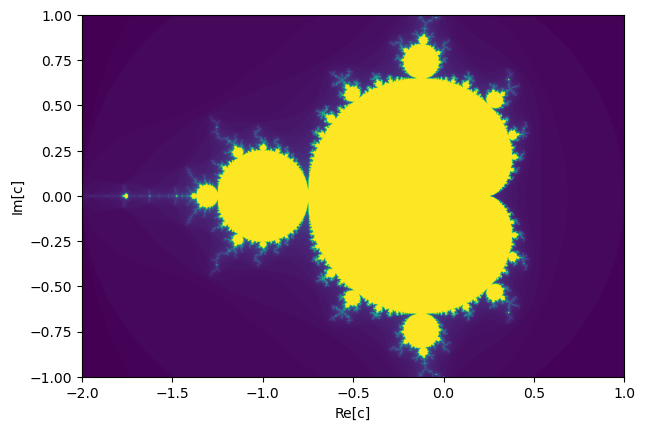

In [59]:
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)

ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]')
ax.imshow(m, extent=[-2.0, 1.0, -1.0, 1.0])

plt.show()

**Paralel Numba**

In [60]:
@numba.njit(parallel=True)
def mandelbrot_numba(X, Y, maxiter):
    mandel = np.empty(shape=X.shape, dtype=np.int32)
    for i in numba.prange(X.shape[0]):
        for j in numba.prange(Y.shape[1]):
            it = 0
            cx = X[i, j]
            cy = Y[i, j]
            x = 0.0
            y = 0.0
            while x * x + y * y < 4.0 and it < maxiter:
                xtemp = x * x - y * y + cx
                y = 2.0 * x * y + cy
                x = xtemp
                it += 1
            mandel[i, j] = it
            
    return mandel

In [61]:
%time m_numba = mandelbrot_numba(X, Y, 100)

CPU times: user 469 ms, sys: 5.92 ms, total: 475 ms
Wall time: 365 ms


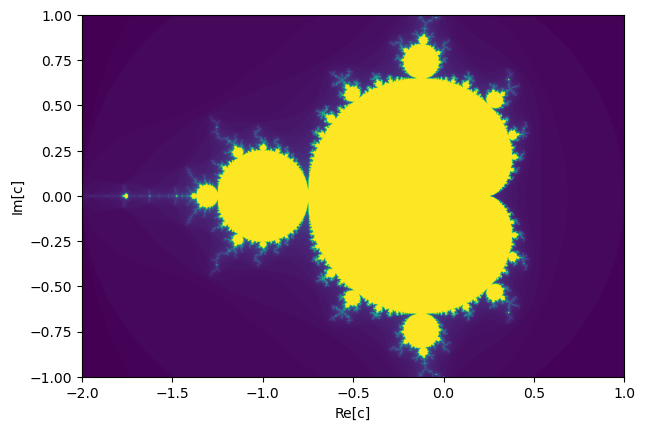

In [62]:
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)

ax.set_aspect('equal')
ax.set_ylabel('Im[c]')
ax.set_xlabel('Re[c]')
ax.imshow(m_numba, extent=[-2.0, 1.0, -1.0, 1.0])

plt.show()

### Informasi tentang Paralel Numba

In [63]:
mandelbrot_numba.parallel_diagnostics(level=3)

 
 Parallel Accelerator Optimizing:  Function mandelbrot_numba, 
/var/folders/d8/_nrt2sy9567f87n08gxx0xc00000gn/T/ipykernel_3446/3627296474.py 
(1)  


Parallel loop listing for  Function mandelbrot_numba, /var/folders/d8/_nrt2sy9567f87n08gxx0xc00000gn/T/ipykernel_3446/3627296474.py (1) 
-----------------------------------------------------------|loop #ID
@numba.njit(parallel=True)                                 | 
def mandelbrot_numba(X, Y, maxiter):                       | 
    mandel = np.empty(shape=X.shape, dtype=np.int32)       | 
    for i in numba.prange(X.shape[0]):---------------------| #2
        for j in numba.prange(Y.shape[1]):-----------------| #1
            it = 0                                         | 
            cx = X[i, j]                                   | 
            cy = Y[i, j]                                   | 
            x = 0.0                                        | 
            y = 0.0                                        | 
            while 